In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('AliAbunimah_Times of Israel.csv', encoding='utf-8', newline='') as f:
    reader = csv.reader((line.replace('\0', '') for line in f))
    times_of_israel = list(reader)
    
with open('AliAbunimah_Haaretz.csv', encoding='utf-8', newline='') as f:
    reader = csv.reader((line.replace('\0', '') for line in f))
    haaretz = list(reader)
    
with open('AliAbunimah_Jerusalem.csv', encoding='utf-8', newline='') as f:
    reader = csv.reader((line.replace('\0', '') for line in f))
    jerusalem = list(reader)

In [3]:
haaretz.pop(0)
haaretz_year = {}

for row in haaretz:
    if row[3][:4] not in haaretz_year:
        haaretz_year[row[3][:4]] = 1
    else:
        haaretz_year[row[3][:4]] += 1

In [4]:
jerusalem.pop(0)
jerusalem_year = {}

for row in jerusalem:
    if row[3][:4] not in jerusalem_year:
        jerusalem_year[row[3][:4]] = 1
    else:
        jerusalem_year[row[3][:4]] += 1

In [5]:
times_of_israel.pop(0)
times_of_israel_year = {}

for row in times_of_israel:
    if row[3][:4] not in times_of_israel_year:
        times_of_israel_year[row[3][:4]] = 1
    else:
        times_of_israel_year[row[3][:4]] += 1

In [6]:
data = []

for i in jerusalem_year:
    je = jerusalem_year[i]
    if i in times_of_israel_year:
        ti = times_of_israel_year[i]
    else:
        ti = 0
    if i in haaretz_year:
        ha = haaretz_year[i]
    else:
        ha = 0
    
    data.append([je, ti, ha])

In [7]:
date = []

for i in jerusalem_year:
    date.append(i)

In [8]:
df = pd.DataFrame(data, index=date, columns =['Jerusalem', 'Times of Israel', "Haaretz"]) 

In [9]:
df = df.sort_index()

In [10]:
df

,Jerusalem,Times of Israel,Haaretz
2008,1,0,2
2009,56,0,42
2010,288,0,86
2011,173,0,99
2012,178,10,97
2013,185,5,32
2014,294,23,35
2015,258,12,37
2016,82,1,24
2017,144,2,18


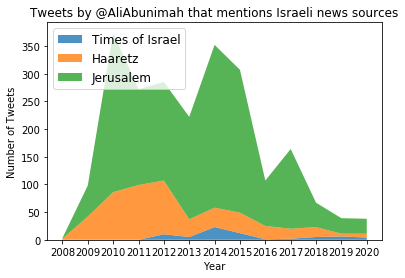

In [11]:
plt.stackplot(df.index,
              [df['Times of Israel'], df['Haaretz'], df['Jerusalem'],],
              labels=['Times of Israel', 'Haaretz', 'Jerusalem'],
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.title("Tweets by @AliAbunimah that mentions Israeli news sources")
plt.ylabel("Number of Tweets")
plt.xlabel("Year")
plt.show()